## Week 2 : Linear Regression
```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
Lab Plan
1. Linear Regression
2. Multiple Linear Regression
3. Polynomial Regression
3.1 Overfitting & underfitting
```

<hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<img src="https://www.alpharithms.com/wp-content/uploads/1156/slope-intercept-vs-linear-regression-equations.jpg"/>



## Typical ML model Training Procedure

1. Define the Task (Supervised or unsupervised Learning, Classification or Regression)  
1. Import necessary libraries
1. Load and Explore the dataset (visualization)
1. Preprocess the Data & split to train/test  (feature selection, scaling, normalization, etc..)
1. Build, Train and Test Model
1. Evaluate model using appropiate evaluation metrics (MSE, $R^2$, accuracy, f-score, precision, recall, etc.. )

## 1. Linear Regression

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied.
<br>
<br>
<center><b>Simple Linear Regression</b></center>
$$y = \beta_0 + \beta_1x_1 $$

### 1.2 Import necessary libraries

In [ ]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

### 1.3 Load from database and Explore the dataset

In [ ]:
from sqlalchemy import create_engine, text

session_engine = create_engine('sqlite:////content/drive/MyDrive/Colab Notebooks/ML/Lab 2/ml-regression.db')

with session_engine.connect() as conn:
    student_scores_df = pd.read_sql_query(text('SELECT * FROM student_scores'), conn)

student_scores_df.drop(columns=['index'], inplace=True)
student_scores_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


### 1.3.1 Data profile and Statistics

<span style="color:red">Task : Get data profile and save it as `.html`</span>

In [ ]:
!pip install ydata_profiling

In [ ]:
from ydata_profiling import ProfileReport

# TODO: Task
student_scores_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### 1.3.2 Visualization

Plot the data points on 2-D graph to eyeball our dataset and see if we can manually find any relationship between the data points. Usually Matplotlib is used but some other libraries exist i.e [Plotly](https://github.com/plotly/plotly.py), [Seaborn](https://seaborn.pydata.org/),[Geoplotlib](https://github.com/andrea-cuttone/geoplotlib/wiki/User-Guide), [Gleam](https://github.com/dgrtwo/gleam), [ggplot](https://github.com/tidyverse/ggplot2)

**Remember :** Plot should have a title, axis labels, and legend for easy interpretation

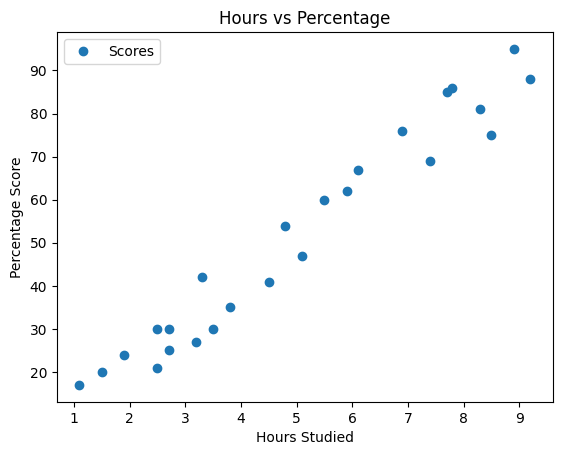

In [ ]:
student_scores_df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

### 1.4 Preprocess the Data & split to train set and test set

<span style="color:red">Task : split the data into train (80%) and test (20%)</span>

In [ ]:
X = student_scores_df.iloc[:, :-1].values
y = student_scores_df.iloc[:, 1].values

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=42)

### 1.5 Build, Train and Test ModelLinear Regression Model

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficient : {regressor.coef_}")

y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

Model intercept : 2.826892353899737
Model coefficient : [9.68207815]


In [ ]:
eval_df

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


### 1.6 Evaluate model using appropiate evaluation metrics

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 3.9207511902099244
Mean Squared Error: 18.943211722315272
Root Mean Squared Error: 4.352380006653288


## 2. Multiple Linear Regression

Linear regression involving multiple variables is called "multiple linear regression"
We will use multiple linear regression to predict the gas consumptions (in millions of gallons) in 48 US states based upon gas taxes (in cents), per capita income (dollars), paved highways (in miles) and the proportion of population that has a drivers license.
We seek a model of the form:

$$\hat{y} = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + ... + \beta_n x_n.$$

### 2.1  Load and Explore the dataset

In [ ]:
with session_engine.connect() as conn:
    petrol_consumption_df = pd.read_sql_query(text('SELECT * FROM petrol_consumption'), conn)

petrol_consumption_df.drop('index', axis=1, inplace=True)
petrol_consumption_df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [ ]:
petrol_consumption_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Petrol_tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
Average_income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
Paved_Highways,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
Population_Driver_licence(%),48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
Petrol_Consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


### 2.2 Preprocess the Data & split to train set and test set

In [ ]:
X = petrol_consumption_df.drop('Petrol_Consumption', axis=1)
y = petrol_consumption_df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### 2.3 Build, Train and Test Model Regression Model

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(f"Model intercept : {regressor.intercept_}")
print(f"Model coefficients : {regressor.coef_}")

Model intercept : 425.5993322032431
Model coefficients : [-4.00166602e+01 -6.54126674e-02 -4.74073380e-03  1.34186212e+03]


### 2.4 Evaluate model using appropriate evaluation metrics

<span style="color:red">Task 1 : Use the predict function in the model(`regressor`) to predict the output of the testset(`X_test`) and  print it. </span>

<span style="color:red">Task  2 : Measure the performance of the model using: <br>     </span>
1. root mean squared error
1. mean absolute error
1. coefficient of determination $R^2$. See [`sklearn.metrics.r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) for $R^2$.

In [ ]:
# TODO: Task 1
y_pred = regressor.predict(X_test)
eval_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

eval_df.head(10)

,Actual,Predicted
29,534,469.391989
4,410,545.645464
26,577,589.668394
30,571,569.730413
32,577,649.774809
37,704,646.631164
34,487,511.608148
40,587,672.475177
7,467,502.074782
10,580,501.270734


In [ ]:
# TODO: Task 2
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('coefficient of determination  R2:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 56.822247478964734
Root Mean Squared Error: 68.31064915215174
coefficient of determination  R2: 0.2036193241012163


## 3. Polynomial Regression, Underfitting & Overfitting

Polynomial Regression, is simply a transformation for the explanatory variables to higher polynomial orders with interactive variables.

1. Why do we need it?
1. Which order of the polynomial should we choose?
2. should we always pick the most complex model?



### 3.2 Import libraries

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures #to convert the original features into their higher order terms
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [ ]:
# help(PolynomialFeatures)

### 3.3 Load and Explore the dataset
<span style="color:red">Task : generate synthetic dataset by adding some random gaussian noise to a cosine function.</span>

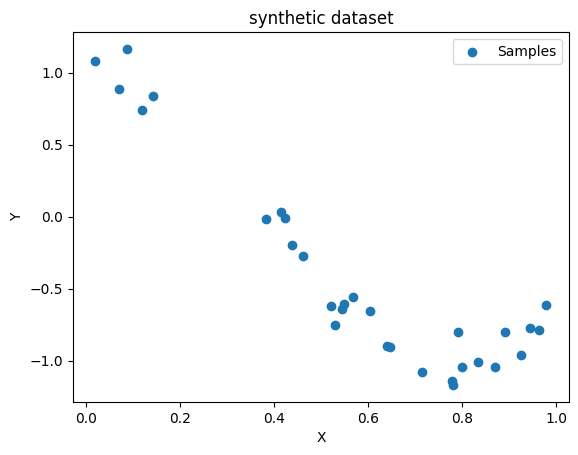

In [ ]:
#  function
def fn(X):
    #Task : one line of code
    return np.cos( 1.3 * np.pi * X)

np.random.seed(0)

n_samples = 30
X = np.sort(np.random.rand(n_samples))
y = fn(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X,y,label="Samples")
plt.title('synthetic dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend(loc="best")
plt.show()

### 3.4 Preprocess the Data, build model and evaluate model

* We will build three polynomial models with degrees [1, 4, 15] and observe the effect of increasing the degree of complixity of the model on how well it suits the data.
* We will evaluate our model using cross validation

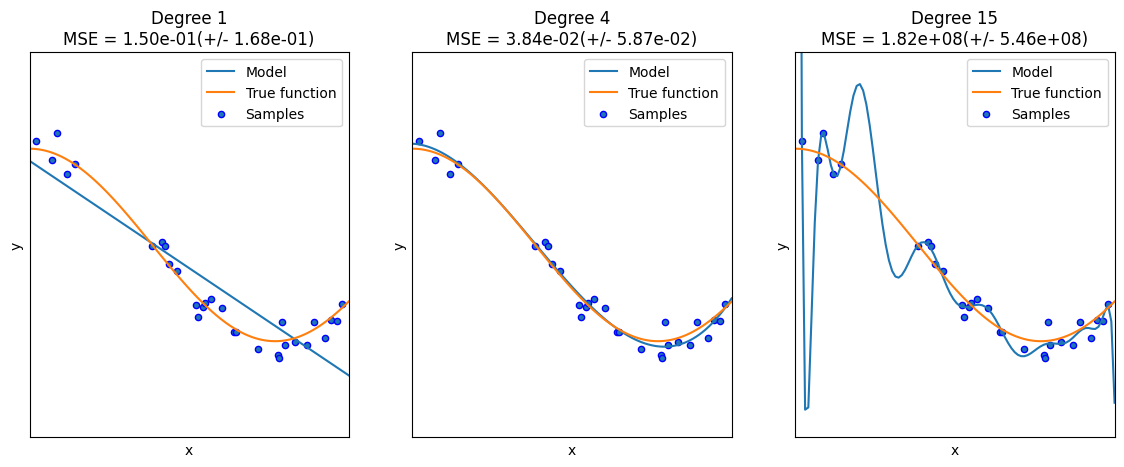

In [ ]:
degrees = [1, 4, 15]

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i])
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),

                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, fn(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

## <center>Self practice</center>

* Using steel industry energy consumption dataset from ([Link](https://archive.ics.uci.edu/dataset/851/steel+industry+energy+consumption)) or `ml-regression.db`.
    1. Split the data to train and test set (80% training). Use [`sklearn.model_selection.train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
    1. Train a multiple linear regression model that will predict the energy consumption `(Usage_kWh)`.
    1. Print the model `Mean Absolute Error`, `Mean Squared Error` and `Root Mean Squared Error`


* Select one indipendent and select `Usage_kWh` as dependent variable
    1. Visualise the data (using `matplotlib`)
    1. Create a Polynomial Regression model using `[1,5,24]` as degrees
    1. Explain your observations in terms of Over-fitting, Under-fitting, Bias-Variance trade-offs.